In [58]:
pip install matplotlib_inline


Note: you may need to restart the kernel to use updated packages.


In [59]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import os
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn import datasets
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "svm"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [60]:
breast_cancer = datasets.load_breast_cancer()
df=pd.DataFrame(breast_cancer.data,columns=breast_cancer.feature_names)
df['MEDV'] = breast_cancer.target
df


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,MEDV
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [61]:
X = breast_cancer.data[:, :2]
y = breast_cancer.target

Saving figure generated_data_plot


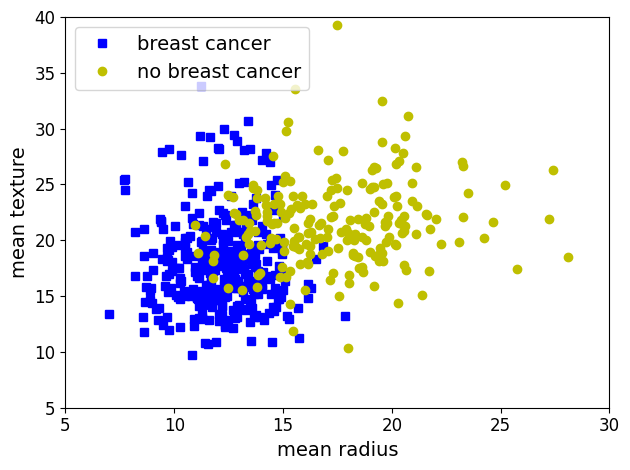

In [62]:
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="breast cancer")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="no breast cancer")
plt.xlabel("mean radius", fontsize=14)
plt.ylabel("mean texture", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([5, 30, 5, 40])
save_fig("generated_data_plot")
plt.show()

In [63]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=0)

# Linear Regression

In [64]:
linear_svm = svm.SVC(kernel='linear')
linear_svm.fit(X_train, y_train)

SVC(kernel='linear')

Saving figure large_margin_classification_plot


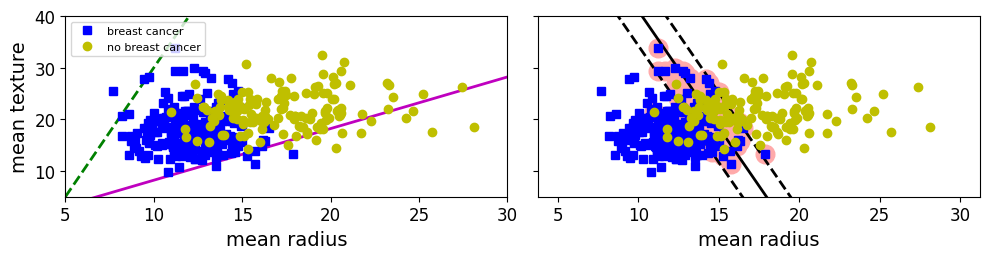

In [65]:
x0 = np.linspace(5, 30, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]
    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X_train[:, 0][y_train==1], X_train[:, 1][y_train==1], "bs", label="breast cancer")
plt.plot(X_train[:, 0][y_train==0], X_train[:, 1][y_train==0], "yo", label="no breast cancer")
plt.xlabel("mean radius", fontsize=14)
plt.ylabel("mean texture", fontsize=14)
plt.legend(loc="upper left", fontsize=8)
plt.axis([5, 30, 5, 40])
plt.sca(axes[1])
plot_svc_decision_boundary(linear_svm, 5,30)
plt.plot(X_train[:, 0][y_train==1], X_train[:, 1][y_train==1], "bs")
plt.plot(X_train[:, 0][y_train==0], X_train[:, 1][y_train==0], "yo")
plt.xlabel("mean radius", fontsize=14)

save_fig("large_margin_classification_plot")
plt.show()

Saving figure sensitivity_to_feature_scales_plot


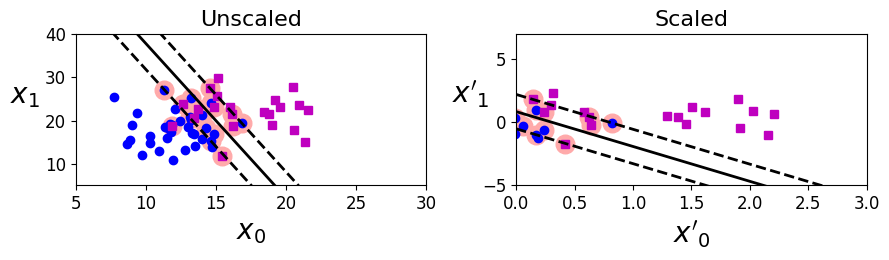

In [66]:

svm_clf = svm.SVC(kernel="linear", C=100)
svm_clf.fit(X_test, y_test)
plt.figure(figsize=(9,2.7))
plt.subplot(121)
plt.plot(X_test[:, 0][y_test==1], X_test[:, 1][y_test==1], "bo")
plt.plot(X_test[:, 0][y_test==0], X_test[:, 1][y_test==0], "ms")
plot_svc_decision_boundary(svm_clf, 5, 30)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$    ", fontsize=20, rotation=0)
plt.title("Unscaled", fontsize=16)
plt.axis([5, 30, 5, 40])
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_test)
svm_clf.fit(X_scaled, y_test)

plt.subplot(122)
plt.plot(X_scaled[:, 0][y_test==1], X_scaled[:, 1][y_test==1], "bo")
plt.plot(X_scaled[:, 0][y_test==0], X_scaled[:, 1][y_test==0], "ms")
plot_svc_decision_boundary(svm_clf,0, 3)
plt.xlabel("$x'_0$", fontsize=20)
plt.ylabel("$x'_1$  ", fontsize=20, rotation=0)
plt.title("Scaled", fontsize=16)
plt.axis([0, 3, -5, 7])
save_fig("sensitivity_to_feature_scales_plot")


# Polynomial Regression

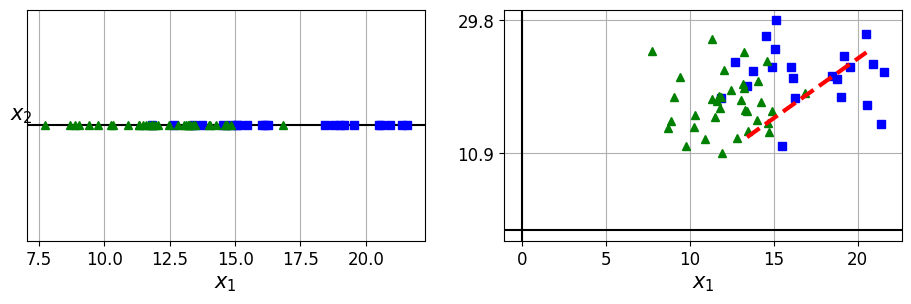

In [67]:
feature1=0
feature2=1
X2D = X_test[:, [feature1, feature2]]

plt.figure(figsize=(10, 3))
plt.subplot(121)

# Plot the 1D dataset
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X2D[:, 0][y_test==0], np.zeros(sum(y_test==0)), "bs")
plt.plot(X2D[:, 0][y_test==1], np.zeros(sum(y_test==1)), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=15)
plt.ylabel(r"$x_2$", fontsize=15, rotation=0)
plt.subplot(122)

# Plot the 2D dataset
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y_test==0], X2D[:, 1][y_test==0], "bs")
plt.plot(X2D[:, 0][y_test==1], X2D[:, 1][y_test==1], "g^")
plt.xlabel(r"$x_1$", fontsize=15)
plt.gca().get_yaxis().set_ticks([X2D[:, 1].max(), X2D[:, 1].min()])
plt.plot(X_test[feature1], X_test[feature2], "r--", linewidth=3)
plt.subplots_adjust(right=1)
plt.show()

c:\Users\silyo\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


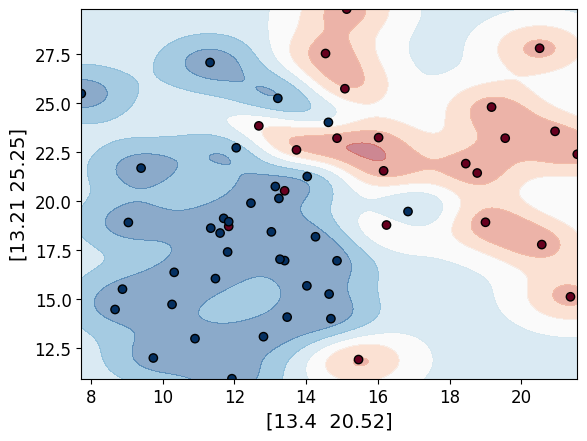

In [68]:
svm_clf = svm.SVC(kernel="rbf", C=1, gamma="auto")
svm_clf.fit(X_test[:, [0, 1]], y_test)

# Create a grid of points to evaluate the decision function
xx, yy = np.meshgrid(np.linspace(X_test[:,0].min(), X_test[:,0].max(), 500),
                     np.linspace(X_test[:,1].min(), X_test[:,1].max(), 500))
Z = svm_clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the data
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.5)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.RdBu, edgecolor='black')
plt.xlabel(X_test[0])
plt.ylabel(X_test[1])
plt.show()

In [69]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
    ])

svm_clf.fit(X_train, y_train)

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])

polynomial_svm_clf.fit(X_train, y_train)

c:\Users\silyo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))])

In [70]:

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

Saving figure moons_polynomial_svc_plot


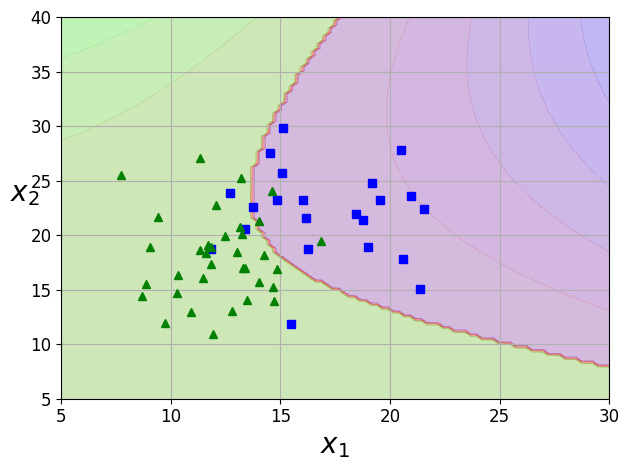

In [71]:

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [5, 30, 5, 40])
plot_dataset(X_test, y_test, [5, 30, 5, 40])

save_fig("moons_polynomial_svc_plot")
plt.show()

In [72]:
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])
rbf_kernel_svm_clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

Saving figure moons_rbf_svc_plot


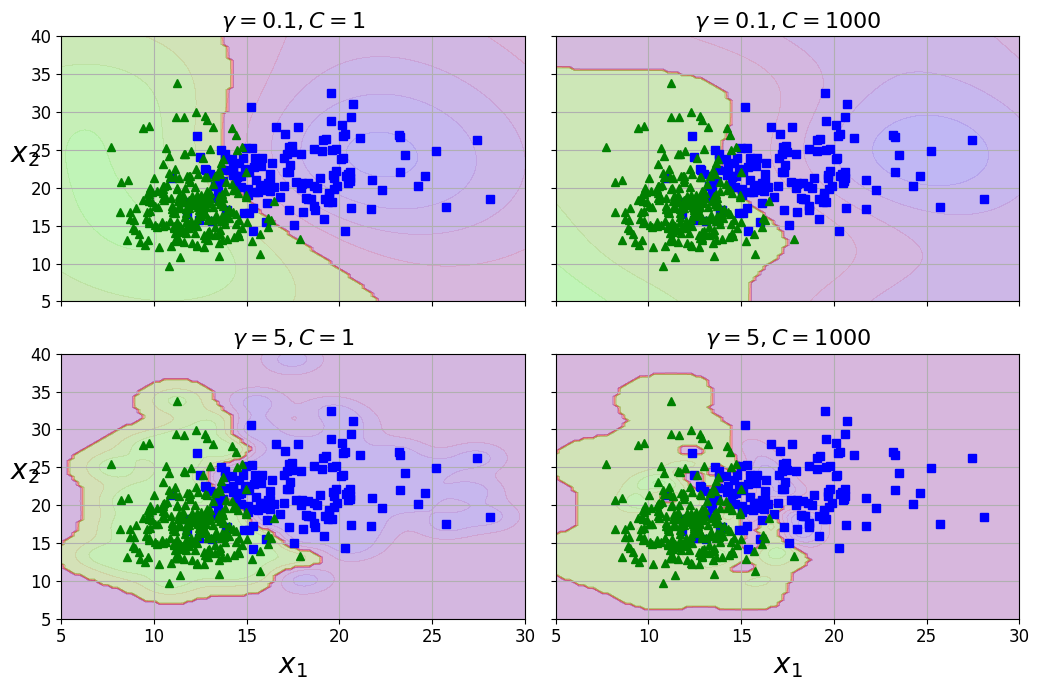

In [73]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 1, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [5, 30, 5, 40])
    plot_dataset(X_train, y_train, [5, 30, 5, 40])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")

save_fig("moons_rbf_svc_plot")
plt.show()

In [74]:
X_train = X_train[:, 0]

In [75]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X_train.reshape(-1,1), y_train)

LinearSVR(epsilon=1.5, random_state=42)

In [76]:
svm_reg1 = LinearSVR(epsilon=1, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X_train.reshape(-1,1), y_train)
svm_reg2.fit(X_train.reshape(-1,1), y_train)

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X_train.reshape(-1,1), y_train)
svm_reg2.support_ = find_support_vectors(svm_reg2, X_train.reshape(-1,1), y_train)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

Saving figure svm_regression_plot


C:\Users\silyo\AppData\Local\Temp\ipykernel_7832\105551062.py:31: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


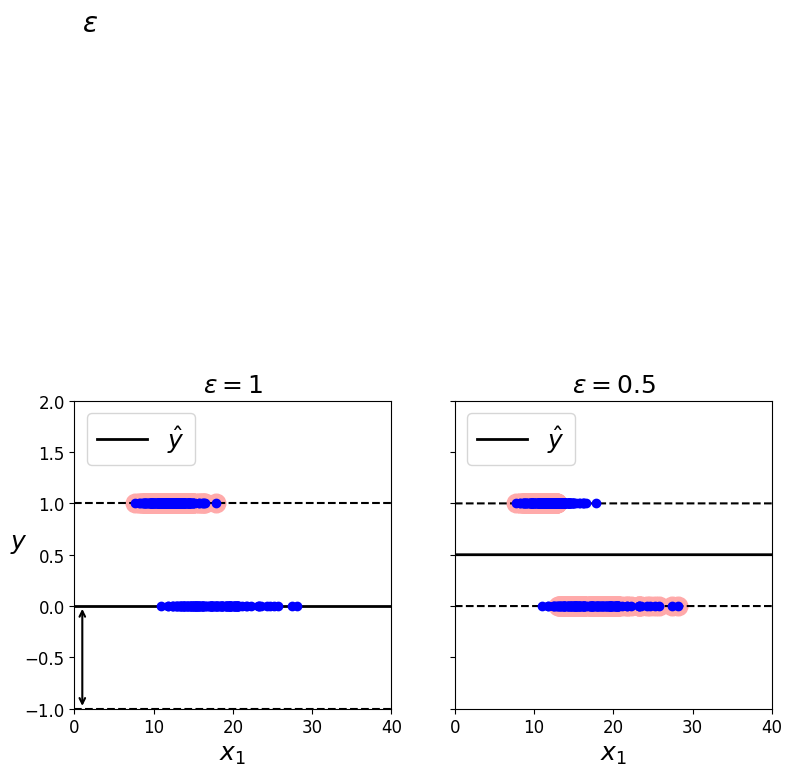

In [77]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_reg1, X_train, y_train, [0, 40, -1, 2])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.sca(axes[1])
plot_svm_regression(svm_reg2, X_train, y_train, [0, 40, -1,2])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)
save_fig("svm_regression_plot")
plt.show()

## PCA

In [78]:
X= breast_cancer.data[:, :3]
X

array([[ 17.99,  10.38, 122.8 ],
       [ 20.57,  17.77, 132.9 ],
       [ 19.69,  21.25, 130.  ],
       ...,
       [ 16.6 ,  28.08, 108.3 ],
       [ 20.6 ,  29.33, 140.1 ],
       [  7.76,  24.54,  47.92]])

In [79]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=0)

In [80]:
X_centered = X_train - X_train.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]
m, n = X_train.shape
S = np.zeros(X_centered.shape)
S[:n, :n] = np.diag(s)
np.allclose(X_centered, U.dot(S).dot(Vt))

True

In [81]:
W2 = Vt.T[:, :2]
X2D = X_centered.dot(W2)
X2D_using_svd = X2D
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X_train)

In [82]:
X2D[:5]

array([[-22.82006398,   2.25695654],
       [-24.04247387,   7.15880627],
       [-10.72715883,   8.08795852],
       [-10.33729694,   3.66943463],
       [-15.52669766,  -2.88173078]])

In [83]:
X2D_using_svd[:5]

array([[-22.82006398,  -2.25695654],
       [-24.04247387,  -7.15880627],
       [-10.72715883,  -8.08795852],
       [-10.33729694,  -3.66943463],
       [-15.52669766,   2.88173078]])

In [84]:
X3D_inv = pca.inverse_transform(X2D)
np.mean(np.sum(np.square(X3D_inv - X_train), axis=1))
X3D_inv_using_svd = X2D_using_svd.dot(Vt[:2, :])
np.allclose(X3D_inv_using_svd, X3D_inv - pca.mean_)

True

In [85]:
pca.components_

array([[ 0.1433815 ,  0.05354813,  0.98821776],
       [-0.01155798,  0.99855764, -0.05243145]])

In [86]:
Vt[:2]

array([[ 0.1433815 ,  0.05354813,  0.98821776],
       [ 0.01155798, -0.99855764,  0.05243145]])

In [87]:
axes = [5, 30, 5, 40, 5, 150]
x1s = np.linspace(axes[0], axes[1], 10)
x2s = np.linspace(axes[2], axes[3], 10)
x1, x2 = np.meshgrid(x1s, x2s)

C = pca.components_
R = C.T.dot(C)
z = (R[0, 2] * x1 + R[1, 2] * x2) / (1 - R[2, 2])

C:\Users\silyo\AppData\Local\Temp\ipykernel_7832\4290152782.py:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  ax.plot([X_train[i][0], X3D_inv[i][0]], [X_train[i][1], X3D_inv[i][1]], [X_train[i][2], X3D_inv[i][2]], "k-", color="#505050")


Saving figure dataset_3d_plot


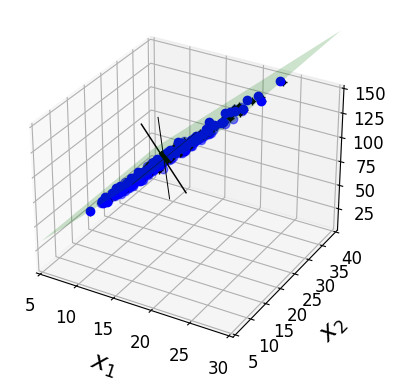

In [88]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(6, 3.8))
ax = fig.add_subplot(111, projection='3d')

X3D_above = X_train[X_train[:, 2] > X3D_inv[:, 2]]
X3D_below = X_train[X_train[:, 2] <= X3D_inv[:, 2]]

ax.plot(X3D_below[:, 0], X3D_below[:, 1], X3D_below[:, 2], "bo", alpha=0.5)

ax.plot_surface(x1, x2, z, alpha=0.2, color="g")
np.linalg.norm(C, axis=0)
ax.quiver(15,20,100, C[0, 0], C[0, 1], C[0, 2],  lw=60, color="k")
ax.quiver(15,20,100, C[1, 0],C[1, 1],C[1, 2],  lw=10, color="k")
ax.plot([15], [20], [100], "k.")

for i in range(m):
    if X_train[i, 2] > X3D_inv[i, 2]:
        ax.plot([X_train[i][0], X3D_inv[i][0]], [X_train[i][1], X3D_inv[i][1]], [X_train[i][2], X3D_inv[i][2]], "k-")
    else:
        ax.plot([X_train[i][0], X3D_inv[i][0]], [X_train[i][1], X3D_inv[i][1]], [X_train[i][2], X3D_inv[i][2]], "k-", color="#505050")
    
ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], "k+")
ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], "k.")
ax.plot(X3D_above[:, 0], X3D_above[:, 1], X3D_above[:, 2], "bo")
ax.set_xlabel("$x_1$", fontsize=18, labelpad=10)
ax.set_ylabel("$x_2$", fontsize=18, labelpad=10)
ax.set_zlabel("$x_3$", fontsize=18, labelpad=10)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

save_fig("dataset_3d_plot")
plt.show()

Saving figure dataset_2d_plot


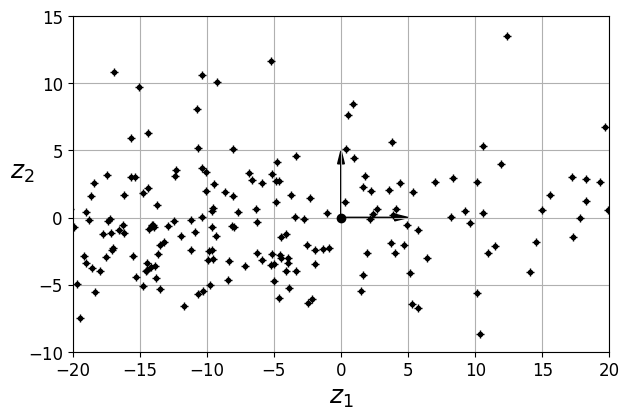

In [89]:
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')

ax.plot(X2D[:, 0], X2D[:, 1], "k+")
ax.plot(X2D[:, 0], X2D[:, 1], "k.")
ax.plot([0], [0], "ko")
ax.arrow(0, 0, 0, 5, head_width=0.5, length_includes_head=True, head_length=1, fc='k', ec='k')
ax.arrow(0, 0, 5, 0, head_width=0.5, length_includes_head=True, head_length=1, fc='k', ec='k')
ax.set_xlabel("$z_1$", fontsize=18)
ax.set_ylabel("$z_2$", fontsize=18, rotation=0)
ax.axis([-20, 20, -10, 15])
ax.grid(True)
save_fig("dataset_2d_plot")

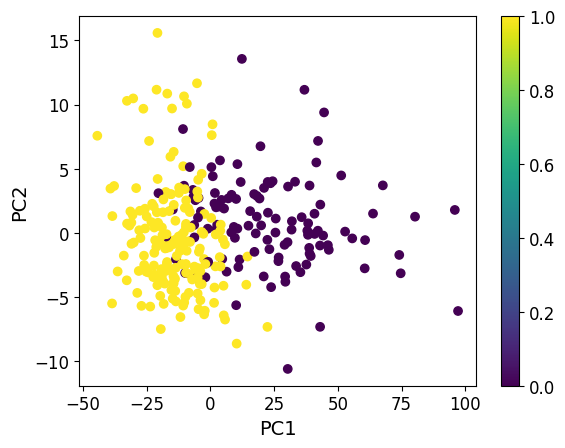

In [90]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# Create a scatter plot of the projected data
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar()
plt.show()

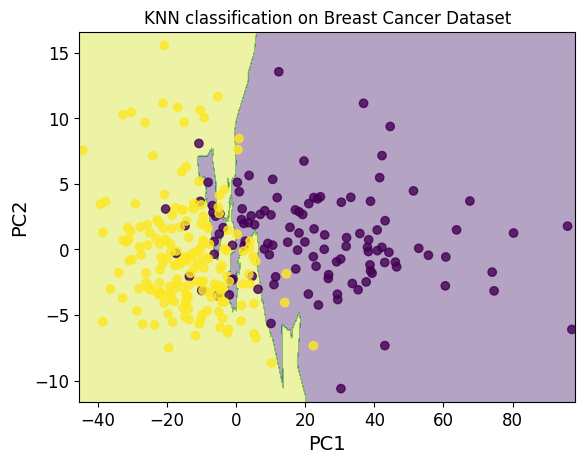

In [91]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_pca, y_train)

# Plot the decision boundary
xmin, xmax = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
ymin, ymax = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(xmin, xmax, 0.1), np.arange(ymin, ymax, 0.1))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, alpha=0.8)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KNN classification on Breast Cancer Dataset')
plt.show()

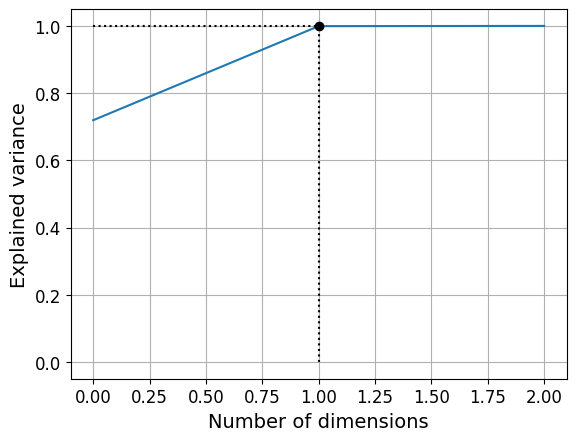

In [92]:
data_std = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
pca = PCA()
pca.fit(data_std)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 2) + 1
plt.plot(cumsum)
plt.plot([d, d], [0, 1], "k:")
plt.plot([0, d], [1, 1], "k:")
plt.plot(d, 1, "ko")
plt.grid(True)
plt.xlabel('Number of dimensions')
plt.ylabel('Explained variance')
plt.show()

In [93]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_train)
pca.n_components_

2

In [94]:
np.sum(pca.explained_variance_ratio_)

0.9999243105773821

## kernel PCA

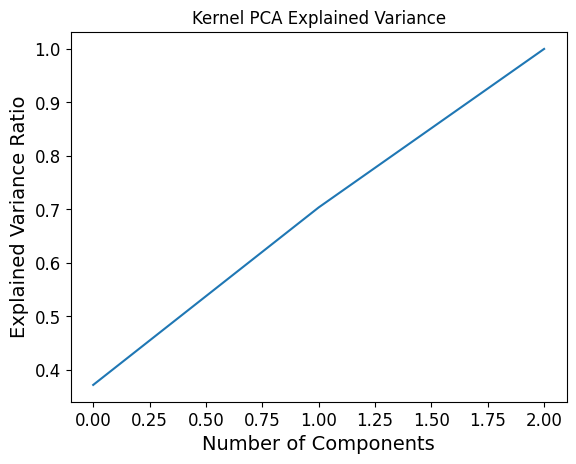

In [95]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=X_train.shape[1], kernel='rbf')
X_kpca = kpca.fit_transform(X_train)

explained_variance = np.var(X_kpca, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)

plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Kernel PCA Explained Variance')
plt.show()

In [96]:
from sklearn.decomposition import KernelPCA
from sklearn.base import BaseEstimator

class KernelPCAWrapper(BaseEstimator):
    def __init__(self, n_components=2, kernel='linear', gamma=None):
        self.n_components = n_components
        self.kernel = kernel
        self.gamma = gamma
        self.kpca_ = KernelPCA(n_components=n_components, kernel=kernel, gamma=gamma)
    
    def fit(self, X, y=None):
        self.kpca_.fit(X)
        return self
    
    def transform(self, X):
        return self.kpca_.transform(X)
    
    def score(self, X, y=None):
        return self.kpca_.fit_transform(X).var(axis=0).sum()

Saving figure kernel_pca_plot


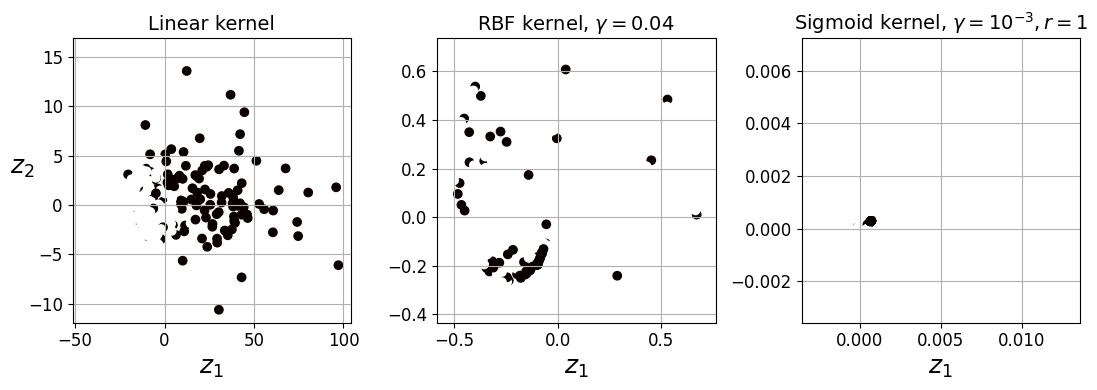

In [97]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X_train)
from sklearn.decomposition import KernelPCA

lin_pca = KernelPCA(n_components = 2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.04, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)

plt.figure(figsize=(11, 4))
for subplot, pca, title in ((131, lin_pca, "Linear kernel"), (132, rbf_pca, "RBF kernel, $\gamma=0.04$"), (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):
    X_reduced = pca.fit_transform(X_train)
    if subplot == 132:
        X_reduced_rbf = X_reduced
    
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_train, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

save_fig("kernel_pca_plot")
plt.show()

Saving figure preimage_plot


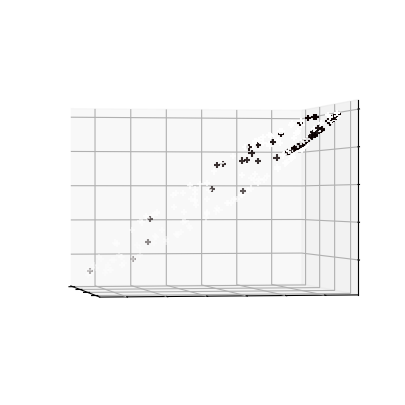

In [98]:
plt.figure(figsize=(6, 5))

X_inverse = rbf_pca.inverse_transform(X_reduced_rbf)

ax = plt.subplot(111, projection='3d')
ax.view_init(0, -10)
ax.scatter(X_inverse[:, 0], X_inverse[:, 1], X_inverse[:, 2], c=y_train, cmap=plt.cm.hot, marker="+")
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_zlabel("")
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
save_fig("preimage_plot", tight_layout=False)
plt.show()

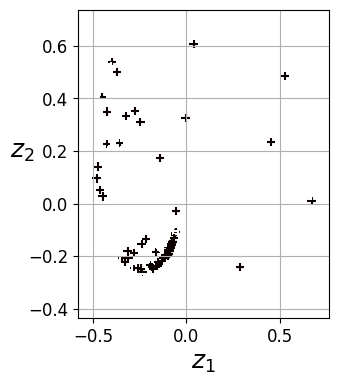

In [99]:
X_reduced = rbf_pca.fit_transform(X_train)
plt.figure(figsize=(11, 4))
plt.subplot(132)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_train, cmap=plt.cm.hot, marker="+")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)

In [100]:
from sklearn.model_selection import GridSearchCV

params = {
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [0.1, 1, 10]
}

kpca = KernelPCAWrapper(n_components=2)
grid_search = GridSearchCV(kpca, param_grid=params, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train)

c:\Users\silyo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\silyo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
c:\Users\silyo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\silyo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 765, in _s

GridSearchCV(cv=5, estimator=KernelPCAWrapper(),
             param_grid={'gamma': [0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='neg_mean_squared_error')

In [101]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
        ("kpca", KernelPCA(n_components=2)),
        ("log_reg", LogisticRegression(solver="lbfgs"))
    ])

param_grid = [{
        "kpca__gamma": np.linspace(0.03, 0.05, 10),
        "kpca__kernel": ["rbf", "sigmoid"]
    }]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', LogisticRegression())]),
             param_grid=[{'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                          'kpca__kernel': ['rbf', 'sigmoid']}])